## Introduction

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns 
import datetime as dt
import folium
from folium.plugins import HeatMap, HeatMapWithTime
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
file = open(os.path.join("..", "data", "energy", "ENERGY-DATA-MONTHLY.xlsx"), "rb")
cover_df = pd.read_excel(file, sheet_name='Cover')

In [3]:
cover_df.shape

(39, 2)

In [4]:
suply_of_solid_fossil_fuels_df = pd.read_csv(os.path.join("..", "data", "energy", "solid_fuels_suply.csv"))

In [5]:
suply_of_solid_fossil_fuels_df.head()

,Coal type,Type,19-Jan,19-Feb,19-Mar,19-Apr,19-May,19-Jun,19-Jul,19-Aug,19-Sep,19-Oct,19-Nov,19-Dec,20-Jan
0,Hard Coal,Indigenous production,5716.360,5326.440,6095.570,5776.587,5777.608,5205.662,5808.765,5618.253,5619.909,5977.462,5686.950,5460.344,5686.405
1,Hard Coal,Recovered and recycled products,86.595,88.267,87.370,53.075,78.781,87.687,84.012,80.082,58.746,55.769,44.646,42.389,51.688
2,Hard Coal,Imports,14811.543,12719.049,12466.863,10973.690,9769.335,9791.180,9433.320,9723.419,9318.425,9928.965,10003.533,9659.904,8769.742
3,Hard Coal,Exports,666.500,705.620,712.596,647.815,784.129,847.471,738.746,719.193,719.029,682.484,763.834,792.656,760.308
4,Hard Coal,Change in stock,1399.672,333.260,-1230.474,-1421.002,-1427.221,-1088.622,-356.748,-1427.743,336.196,164.728,232.417,400.477,600.722


In [6]:

delivery_of_primary_coal_by_sector_df = pd.read_csv(os.path.join("..", "data", "energy", "delivery_of_primary_coal_by_sector.csv"))

In [7]:
delivery_of_primary_coal_by_sector_df.head()

,Type,Sector,Jan-19,Feb-19,Mar-19,Apr-19,May-19,Jun-19,Jul-19,Aug-19,Sep-19,Oct-19,Nov-19,Dec-19
0,Hard Coal,Transformation input - coke ovens,3804.751,3529.377,3952.336,3969.765,4064.549,3948.641,4048.884,4014.950,3856.715,3667.121,3627.287,3580.923
1,Hard Coal,Final consumption - industry sector,3216.995,3239.377,3360.693,3093.582,2726.120,2628.647,2579.410,2628.119,2701.073,2723.304,2326.139,2341.370
2,Hard Coal,Transformation input - electricity and heat ge...,10479.196,9312.672,8024.345,6720.287,5130.762,5227.743,5843.003,5186.128,6421.785,7047.179,7852.037,7700.293
3,Hard Coal,Final consumption - industry sector - iron and...,1851.023,1743.872,1926.466,1814.658,1520.728,1496.999,1566.899,1513.725,1472.628,1424.804,1075.759,1026.336
4,Hard Coal,Final consumption - other sectors,938.851,883.968,963.999,861.867,813.319,838.348,894.871,848.627,905.120,970.287,1058.931,1137.454


In [8]:
electricity_supply_df = pd.read_csv(os.path.join("..", "data", "energy", "electricity_supply.csv"), header=None)

In [9]:
electricity_supply_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,Total,300252.213,259483.290,268767.970,241358.310,240009.400,231411.003,242408.532,231586.831,231265.896,251148.805,263543.848,272629.347,274946.571
1,Nuclear fuels and other fuels n.e.c.,76146.461,68956.133,70712.203,64905.026,62034.737,58140.134,61524.217,61227.535,60210.415,63670.607,63160.050,68881.382,72409.315
2,Combustible fuels,146802.629,117925.343,107785.733,101248.343,99830.909,96237.890,111373.623,104502.437,103331.722,117729.203,122669.296,110461.351,114167.714
3,Coal and manufactured gases,51255.189,41767.518,34842.190,33113.446,31364.208,27357.149,30579.233,28995.904,28165.746,34020.431,39501.064,34591.470,34615.642
4,Oil and petroleum products (excluding biofuel ...,3220.305,2690.024,2724.894,2640.688,2778.969,2936.172,3122.926,3182.613,2962.797,3030.748,2748.984,2881.941,2858.738


In [10]:
crude_oil_df =  pd.read_csv(os.path.join("..", "data", "energy", "crude_oil.csv"))

In [11]:
crude_oil_df.head()

,Crude oil (Without NGL),2019M01,2019M02,2019M03,2019M04,2019M05,2019M06,2019M07,2019M08,2019M09,2019M10,2019M11,2019M12,2020M01
0,Indigenous production,6012.481,5731.782,6238.210,5730.741,5909.916,5513.389,5588.356,5164.632,5455.161,5503.248,5577.198,5680.873,5812.156
1,Imports,49292.715,43548.719,46005.069,45659.680,44025.672,43890.695,48428.800,48828.453,45081.786,46881.555,44798.313,46096.871,38258.362
2,Exports,3850.000,3686.000,3760.000,3916.000,4216.961,3910.000,3641.000,3113.000,3832.000,3507.000,3969.000,3874.000,3665.038
3,Refinery intake - observed,50187.171,43805.018,47790.975,46571.240,46646.166,45510.769,50782.238,51111.330,46508.172,48210.534,45929.500,48195.518,40695.761
4,Change in stock,118.168,2202.578,819.441,368.721,-521.060,528.773,-1189.478,-120.830,7.597,1041.844,-268.876,-889.580,-409.716


In [12]:
delivery_of_primary_coal_by_sector_df = pd.read_csv(os.path.join("..", "data", "energy", "delivery_of_primary_coal_by_sector.csv"))

In [13]:
refinery_intake_crude_oil_df = pd.read_csv(os.path.join("..", "data", "energy", "refinery_intake_crude_oil.csv"))

In [14]:
refinery_intake_crude_oil_df.head()

,Country,Jan-19,Feb-19,Mar-19,Apr-19,May-19,Jun-19,Jul-19,Aug-19,Sep-19,Oct-19,Nov-19,Dec-19,Jan-20
0,European Union,50187.171,43805.018,47790.975,46571.24,46646.166,45510.769,50782.238,51111.33,46508.172,48210.534,45929.5,48195.518,40695.761
1,Euro area,38192.171,32931.018,36702.975,35427.24,35300.166,33805.769,38225.238,38516.33,35577.172,36378.534,34124.5,35945.518,28399.805
2,Belgium,3118.000,2828.000,3007.000,2947.00,2871.000,2836.000,2890.000,2968.00,2719.000,2801.000,2803.0,2737.000,2891.200
3,Bulgaria,577.000,527.000,347.000,565.00,625.000,598.000,617.000,613.00,574.000,646.000,585.0,557.000,569.434
4,Czechia,600.000,587.000,660.000,554.00,689.000,637.000,724.000,715.00,694.000,681.000,682.0,624.000,650.000


In [17]:
gross_inland_deliveries_coal_all_df = pd.read_csv(os.path.join("..", "data", "energy", "gross_inland_deliveries_coal_all.csv"))

In [18]:
gross_inland_deliveries_coal_all_df.head()

,Country,19-Jan,19-Feb,19-Mar,19-Apr,19-May,19-Jun,19-Jul,19-Aug,19-Sep,19-Oct,19-Nov,19-Dec,20-Jan
0,European Union,55822.154,47971.946,44974.295,42561.335,39811.593,35960.221,39300.775,38385.693,39553.295,42492.161,43916.205,41578.327,41608.780
1,Euro area,30765.367,27041.760,24643.340,24162.379,21422.326,19003.291,20782.199,19898.202,20252.940,21639.512,24028.320,21560.762,22155.483
2,Belgium,307.100,262.000,308.500,289.800,307.100,284.800,305.500,303.000,298.100,304.900,294.100,283.900,316.000
3,Bulgaria,3659.659,2786.045,2151.791,1893.062,2383.267,1490.606,2000.476,2078.488,2499.393,2849.267,2436.261,2657.902,2422.370
4,Czechia,3905.907,3845.770,4079.931,3657.350,3262.562,2952.259,2922.779,3224.399,3304.415,3617.779,3733.538,3775.289,3766.488


## Data visualization


### Gross inland delivery of coal


In [19]:
## get country codes
country_codes_df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_world_gdp_with_codes.csv')
country_codes_df.columns = ['Country', 'GDP', 'CODE']

In [20]:
data_df = gross_inland_deliveries_coal_all_df.merge(country_codes_df, on='Country')
data_tr_df = data_df.melt(id_vars=["Country", "GDP", "CODE"], 
        var_name="Date", 
        value_name="Value")
data_tr_df['Value'] = data_tr_df['Value'].apply(lambda x: float(x))

In [21]:
data_tr_df.head(10)

,Country,GDP,CODE,Date,Value
0,Belgium,527.80,BEL,19-Jan,307.100
1,Bulgaria,55.08,BGR,19-Jan,3659.659
2,Denmark,347.20,DNK,19-Jan,336.444
3,Germany,3820.00,DEU,19-Jan,16522.459
4,Estonia,26.36,EST,19-Jan,1931.714
5,Ireland,245.80,IRL,19-Jan,NaN
6,Greece,246.40,GRC,19-Jan,3574.887
7,Spain,1400.00,ESP,19-Jan,1848.000
8,France,2902.00,FRA,19-Jan,983.614
9,Croatia,57.18,HRV,19-Jan,61.000


In [23]:
import plotly.express as px

df = data_tr_df
max_value = max(df['Value'])
min_value = min(df['Value'])
hover_text = []
for index, row in df.iterrows():
    hover_text.append(('Date: {}<br>'+
                       'Country: {}<br>'+
                      'Value: {}<br>').format(row['Date'], 
                                            row['Country'],
                                            row['Value']))
df['hover_text'] = hover_text
fig = px.choropleth(df, locations="CODE",
                    color="Value", # 
                    hover_name="hover_text",
                    color_continuous_scale=px.colors.sequential.Plasma, animation_frame="Date",
                    range_color =[min_value,max_value],
                    width=900, height=674)
fig.update_geos( 
    showcoastlines=True, coastlinecolor="DarkBlue",
    showland=True, landcolor="LightGrey",
    showocean=True, oceancolor="LightBlue",
    showlakes=True, lakecolor="Blue",
    showrivers=True, rivercolor="Blue",
    showcountries=True, countrycolor="DarkBlue"
)
fig.update_layout(title = 'Europe Gross inland delivery coal (all) - thousand tones<br>(hover for details)')
fig.show()




In [24]:
to_export_df = df[['Country', 'GDP', 'Date', 'Value']]
to_export_df['Unit'] = "thousand tones"
to_export_df.head()

,Country,GDP,Date,Value,Unit
0,Belgium,527.80,19-Jan,307.100,thousand tones
1,Bulgaria,55.08,19-Jan,3659.659,thousand tones
2,Denmark,347.20,19-Jan,336.444,thousand tones
3,Germany,3820.00,19-Jan,16522.459,thousand tones
4,Estonia,26.36,19-Jan,1931.714,thousand tones


In [25]:
to_export_df.to_csv("../data/processed/energy_gross_inland_deliveries_coal_all.csv", index=False)

#### Test

In [26]:
to_export_df = pd.read_csv("../data/processed/energy_gross_inland_deliveries_coal_all.csv")
to_export_df.head()

,Country,GDP,Date,Value,Unit
0,Belgium,527.80,19-Jan,307.100,thousand tones
1,Bulgaria,55.08,19-Jan,3659.659,thousand tones
2,Denmark,347.20,19-Jan,336.444,thousand tones
3,Germany,3820.00,19-Jan,16522.459,thousand tones
4,Estonia,26.36,19-Jan,1931.714,thousand tones


## Refinery intake crude oil

In [27]:
data_df = refinery_intake_crude_oil_df.merge(country_codes_df, on='Country')
data_tr_df = data_df.melt(id_vars=["Country", "GDP", "CODE"], 
        var_name="Date", 
        value_name="Value")
data_tr_df['Value'] = data_tr_df['Value'].apply(lambda x: float(x))

In [28]:
import plotly.express as px
df = data_tr_df
max_value = max(df['Value'])
min_value = min(df['Value'])
hover_text = []
for index, row in df.iterrows():
    hover_text.append(('Date: {}<br>'+
                       'Country: {}<br>'+
                      'Value: {}<br>').format(row['Date'], 
                                            row['Country'],
                                            row['Value']))
df['hover_text'] = hover_text
fig = px.choropleth(df, locations="CODE",
                    color="Value", # 
                    hover_name="hover_text",
                    color_continuous_scale=px.colors.sequential.Plasma, animation_frame="Date",
                    range_color =[min_value,max_value],
                    width=900, height=674)
fig.update_geos( 
    showcoastlines=True, coastlinecolor="DarkBlue",
    showland=True, landcolor="LightGrey",
    showocean=True, oceancolor="LightBlue",
    showlakes=True, lakecolor="Blue",
    showrivers=True, rivercolor="Blue",
    showcountries=True, countrycolor="DarkBlue"
)
fig.update_layout(title = 'Europe Refinery intake crude oil (all)<br>(hover for details)')
fig.show()


In [29]:
to_export_df = df[['Country', 'GDP', 'Date', 'Value']]
to_export_df['Unit'] = "thousand tones"
to_export_df.head()

,Country,GDP,Date,Value,Unit
0,Belgium,527.80,Jan-19,3118.000,thousand tones
1,Bulgaria,55.08,Jan-19,577.000,thousand tones
2,Denmark,347.20,Jan-19,683.000,thousand tones
3,Germany,3820.00,Jan-19,7535.171,thousand tones
4,Estonia,26.36,Jan-19,0.000,thousand tones


In [30]:
to_export_df.to_csv("../data/processed/refinery_intake_crude_oil_all.csv", index=False)

### Test

In [31]:
to_export_df = pd.read_csv("../data/processed/refinery_intake_crude_oil_all.csv")
to_export_df.head()

,Country,GDP,Date,Value,Unit
0,Belgium,527.80,Jan-19,3118.000,thousand tones
1,Bulgaria,55.08,Jan-19,577.000,thousand tones
2,Denmark,347.20,Jan-19,683.000,thousand tones
3,Germany,3820.00,Jan-19,7535.171,thousand tones
4,Estonia,26.36,Jan-19,0.000,thousand tones


## Electricity supply per domain

In [32]:
electricity_supply_df.columns = gross_inland_deliveries_coal_all_df.columns
electricity_supply_df.head()

,Country,19-Jan,19-Feb,19-Mar,19-Apr,19-May,19-Jun,19-Jul,19-Aug,19-Sep,19-Oct,19-Nov,19-Dec,20-Jan
0,Total,300252.213,259483.290,268767.970,241358.310,240009.400,231411.003,242408.532,231586.831,231265.896,251148.805,263543.848,272629.347,274946.571
1,Nuclear fuels and other fuels n.e.c.,76146.461,68956.133,70712.203,64905.026,62034.737,58140.134,61524.217,61227.535,60210.415,63670.607,63160.050,68881.382,72409.315
2,Combustible fuels,146802.629,117925.343,107785.733,101248.343,99830.909,96237.890,111373.623,104502.437,103331.722,117729.203,122669.296,110461.351,114167.714
3,Coal and manufactured gases,51255.189,41767.518,34842.190,33113.446,31364.208,27357.149,30579.233,28995.904,28165.746,34020.431,39501.064,34591.470,34615.642
4,Oil and petroleum products (excluding biofuel ...,3220.305,2690.024,2724.894,2640.688,2778.969,2936.172,3122.926,3182.613,2962.797,3030.748,2748.984,2881.941,2858.738


In [33]:
data_tr_df = electricity_supply_df.melt(id_vars=["Country"], 
        var_name="Date", 
        value_name="Value")
data_tr_df['Value'] = data_tr_df['Value'].apply(lambda x: float(x))

In [34]:
data_tr_df.columns = ['Type', 'Date', 'Value']
data_tr_df.head()

,Type,Date,Value
0,Total,19-Jan,300252.213
1,Nuclear fuels and other fuels n.e.c.,19-Jan,76146.461
2,Combustible fuels,19-Jan,146802.629
3,Coal and manufactured gases,19-Jan,51255.189
4,Oil and petroleum products (excluding biofuel ...,19-Jan,3220.305


In [35]:
def plot_time_variation(df, y='Value', size=1, is_log=False, title=""):
    f, ax = plt.subplots(1,1, figsize=(3*size,4*size))

    types = list(df.Type.unique())
    for _type in types:
        df_ = df[(df['Type']==_type)] 
        g = sns.lineplot(x="Date", y=y, data=df_,  label=_type)  
        ax.text(max(df_['Date']), (df_.loc[df_['Date']==max(df_['Date']), y]), str(_type),size=12)
    plt.xticks(rotation=90)
    plt.title(f'{title}')
    ax.text(max(df_['Date']), (df_.loc[df_['Date']==max(df_['Date']), y]), str(_type))
    #plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    if(is_log):
        ax.set(yscale="log")
    ax.grid(color='black', linestyle='dotted', linewidth=1.5)
    plt.show()  


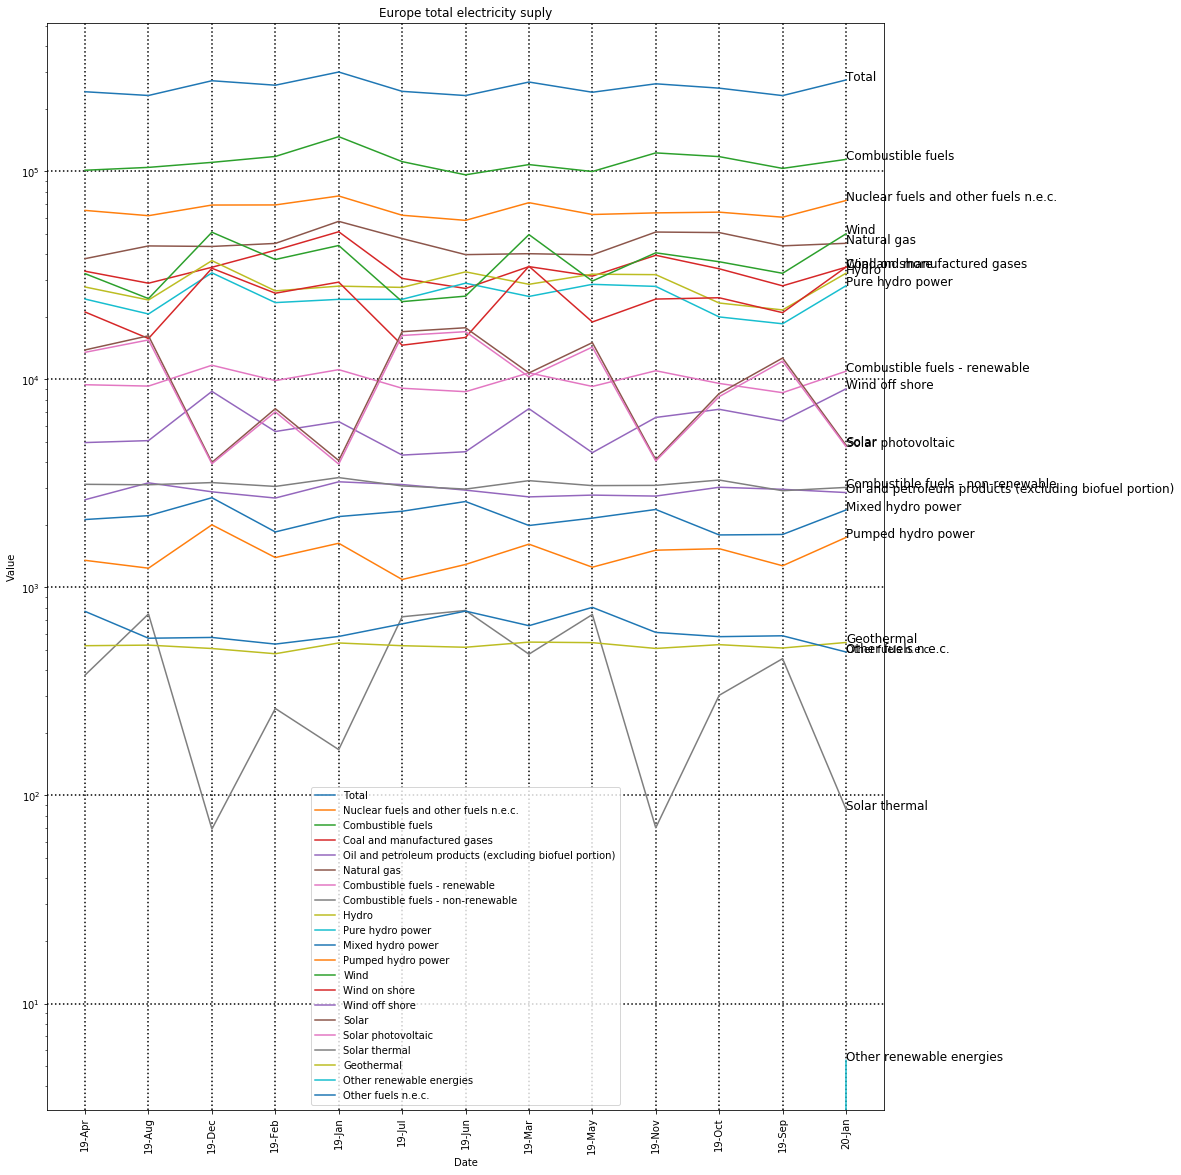

In [36]:
plot_time_variation(data_tr_df, y = 'Value', size=5, is_log=True, title="Europe total electricity suply")

In [37]:
data_tr_df = delivery_of_primary_coal_by_sector_df.melt(id_vars=["Type", "Sector"], 
        var_name="Date", 
        value_name="Value")
data_tr_df['Value'] = data_tr_df['Value'].apply(lambda x: float(x))

In [38]:
data_tr_df.head()

,Type,Sector,Date,Value
0,Hard Coal,Transformation input - coke ovens,Jan-19,3804.751
1,Hard Coal,Final consumption - industry sector,Jan-19,3216.995
2,Hard Coal,Transformation input - electricity and heat ge...,Jan-19,10479.196
3,Hard Coal,Final consumption - industry sector - iron and...,Jan-19,1851.023
4,Hard Coal,Final consumption - other sectors,Jan-19,938.851


In [25]:
min(data_tr_df.Value), max(data_tr_df.Value)

(126.434, 25749.724)